# Flow over Bump (p. 644)

## Lesson Outline
- topic 1
- topic 2
- topic 3

## Readings

1. [CE-3305-2022-2 (Summer2) Syllabus](http://54.243.252.9/ce-3305-webroot-su22/0-Syllabus/ce-3305-2022-1-syllabus.html)

2. Hibbeler, R.C, Fluid Mechanics, 2ed. Prentice Hall, 2018. ISBN: 9780134655413 pp. 3-14

3. DF Elger, BC Williams, Crowe, CT and JA Roberson, *Engineering Fluid Mechanics 10th edition*, John Wiley & Sons, Inc., 2013.  (placeholder file to get links working). [http://54.243.252.9/ce-3305-webroot/3-Readings/EFM-17.pdf](http://54.243.252.9/ce-3305-webroot/3-Readings/EFM-17.pdf)

4. Cleveland, T. G. (2014) *Fluid Mechanics Notes to Accompany CE 3305 at Jade-Holshule (TTU Study Abroad 2015-2019)*, Department of Civil, Environmental, and Construction Engineering, Whitacre College of Engineering. [http://54.243.252.9/ce-3305-webroot/3-Readings/ce3305-lecture-001.1.pdf](http://54.243.252.9/ce-3305-webroot/3-Readings/ce3305-lecture-001.1.pdf)

## Specific Energy

The height of the energy grade line (EGL) above the channel bottom is the formal definition of this concept.

> From pg. 19 Sturm
>![](specificNRG-define.png)

A skecth showing the relationship(s) of various common hydraulic components is

![](specificNRG-drawing.png)

where, <br> 
- $z$ is the elevation of the channel bottom above some datum (or the thalweg point), <br>
- $y$ is the flow depth, and <br> 
- $\frac{\alpha V^2}{2g}$ is the velocity head (with kinetic energy correction term).

## Applications

The specific energy concept is useful in gradually varied flow calculations end even forms one algorithm to compute (predict) the location of the free surface. It is also vital in determining the flow regime (subcritical ,supercritical, and critical).

Another use is in the analysis and design of transitions (to connect different channel geometries in engineered channels).  

## Example 1.  Flow over a step

A classic example being the estimation of flow depth over a step in a channel (or sand bar, or spread footing ...)

![](channelstep.png)

In the drawing above the EGL is horizontal, so there is no head loss.   The total energy at the two sections is the same.  If we write the energy equation for the two sections we have:

$$ y_1 + \frac{\alpha V_1^2}{2g} + z_1 = y_2 + \frac{\alpha V_2^2}{2g} + z_2 + h_{L;1->2}$$

The last term is zero (it is the slope of the EGL multiplied by the horizontal distance from section 1 to 2), if we express the channel elevations in terms of the approach depth we have

$$ y_1 + \frac{\alpha V_1^2}{2g} + z_1 = y_2 + \frac{\alpha V_2^2}{2g} + (z_1+\Delta z) $$

Subtract the approach elevation from both sides

$$ y_1 + \frac{\alpha V_1^2}{2g}  = y_2 + \frac{\alpha V_2^2}{2g} + \Delta z $$

Expressed in a discharge form

$$ y_1 + \frac{\alpha Q^2}{2gA_1^2}  = y_2 + \frac{\alpha Q^2}{2gA_2^2} + \Delta z $$

Assuming a recrangular channel

$$ y_1 + \frac{\alpha Q^2}{2g B^2 y_1^2}  = y_2 + \frac{\alpha Q^2}{2g B^2 y_2^2} + \Delta z $$

Then knowing $Q$, $\Delta z$, $B$, and $y_1$ we can solve for $y_2$

One could either be elegant, or just brute force an answer.

Below we will try for elegant, rearrange into

$$ f(y_2) =  y_2 + \frac{\alpha Q^2}{2g B^2 y_2^2} + \Delta z  - (y_1 + \frac{\alpha Q^2}{2g B^2 y_1^2}) $$

and use a numerical method to find values that make $f(y_2)=0$ (the equation is a cubic, so as many as three are anticipated)

In [292]:
# Find y2 given y1, B, Q, deltaz
deltaz = 0.5 #m zero means no step
B = 1.0  #m
y1 = 1.4 #m
Q = 1.0  #m^3/s
g = 9.81 #m/s^2
y2 = 0.0 #m initial guess

def spNRG(y,width,discharge,gravity): #specific energy in a rectangular channel
    numerator=discharge**2
    denominator=(2.0*gravity)*(width**2)*(y**2)
    if denominator == 0.0: #probably depth is zero
        raise Exception("divide by zero, check your inputs dumbass!")
    spNRG=numerator/denominator + y
    return(spNRG)

def func(y1,y2,width,discharge,gravity,deltaz): #our function to find zeros
    func = spNRG(y2,width,discharge,gravity) + deltaz - spNRG(y1,width,discharge,gravity)
    return(func)

In [295]:
# Set-up a bisection-type solver
howmany = 25 # number of iterations
clow = 0.5 # lower limit for y2
chigh = 1.50 # upper limit for y2
dtrue = 0.0 # ground truth value
tol = 1e-6 # desired accuracy

import numpy # useful library with absolute value and sign functions

############ Learning Phase ################
# check if clow and chigh bound a solution
if numpy.sign(func(y1,clow,B,Q,g,deltaz)-dtrue) == numpy.sign(func(y1,chigh,B,Q,g,deltaz)-dtrue):
    print(func(y1,clow,B,Q,g,deltaz)-dtrue)
    print(func(y1,chigh,B,Q,g,deltaz)-dtrue)
    raise Exception("The scalars clow and chigh do not bound a solution")

for iteration in range(howmany):  

# get midpoint
    m = (clow + chigh)/2

    if numpy.abs(func(y1,m,B,Q,g,deltaz)-dtrue) < tol:
        # stopping condition, report m as root
        print('y2 = ',round(m,3),"f(y2)=",round(func(y1,m,B,Q,g,deltaz),3))
        break
    elif numpy.sign(func(y1,clow,B,Q,g,deltaz)-dtrue) == numpy.sign(func(y1,m,B,Q,g,deltaz)-dtrue):
        # case where m is an improvement on a. 
        # Make recursive call with a = m
        clow = m # update clow with m
    elif numpy.sign(func(y1,chigh,B,Q,g,deltaz)-dtrue) == numpy.sign(func(y1,m,B,Q,g,deltaz)-dtrue):
        # case where m is an improvement on b. 
        # Make recursive call with b = m
        chigh = m # update chigh with m
####################################################

y2 =  0.857 f(y2)= -0.0


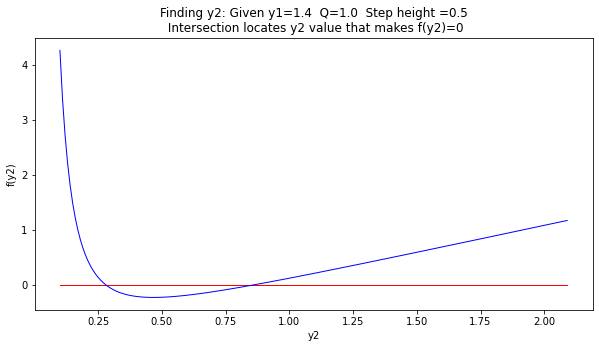

In [294]:
# Or make a graph and read from a prot
y2list = []
f2list = []
startguess = 0.1
for i in range(200):
    guess = startguess + float(i)*0.01
    y2list.append(guess)
    f2list.append(func(y1,guess,B,Q,g,deltaz))
import matplotlib.pyplot as plt # the python plotting library
plottitle ='Finding y2: Given y1=' + str(y1) + '  Q=' + str(Q) + '  Step height ='+str(deltaz) + '\n Intersection locates y2 value that makes f(y2)=0'
mydata = plt.figure(figsize = (10,5)) # build a square drawing canvass from figure class
plt.plot([y2list[0],y2list[-1]], [0,0], c='red',linewidth=1) 
plt.plot(y2list, f2list, c='blue',linewidth=1)
plt.xlabel('y2')
plt.ylabel('f(y2)')
plt.title(plottitle)
plt.show()

One can easily modify the script for the case where the head loss is non-zero.  

The equation in that case is

$$ f(y_2) =  y_2 + \frac{\alpha Q^2}{2g B^2 y_2^2} + \Delta z  + (h_{L;1->2}) - (y_1 + \frac{\alpha Q^2}{2g B^2 y_1^2}) $$

Variations on this approach are the basis of specific energy solutions to open channel hydraulics problems.

The book provides guidance that use of the channel bottom as the datum should be limited to cases with slopes smaller than 6$^o$, greater slopes would require some consideration of the departure of streamlines from the horizontal to account for flow depth being perpindicular to the bottom, but the distances being strictly vertical in the above formulations.

![](limitslope.png)

## Specific Energy Diagram

The plot of depth versus specific energy in a particular channel is the specific energy diagram.  Typically the discharge per unit width is used to define the velocity $\frac{Q}{T} = q$  and  $V= \frac{q}{y}$.

![](specificNRG-diagram.png)

we can use our functions above to make our own diagram

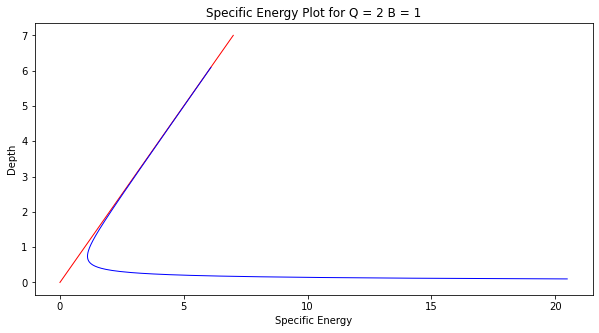

In [156]:
# Or make a graph and read from a prot
Q = 2
B = 1
g = 9.81
ylist = []
Elist = []
startvalue = 0.1
for i in range(600):
    guess = startvalue + float(i)*0.01
    ylist.append(guess)
    Elist.append(spNRG(guess,B,Q,g))
import matplotlib.pyplot as plt # the python plotting library
plottitle ='Specific Energy Plot for Q = ' + str(Q) + ' B = ' + str(B)
mydata = plt.figure(figsize = (10,5)) # build a square drawing canvass from figure class
plt.plot([0,7], [0,7], c='red',linewidth=1) 
plt.plot(Elist, ylist, c='blue',linewidth=1)
plt.xlabel('Specific Energy')
plt.ylabel('Depth')
plt.title(plottitle)
plt.show()

## Choke

A limiting condition for the step in a channel occurs when $\Delta z$ is larger than $\Delta z_c$, which is the difference between the approach specific energy and the minimum specific energy.  

For an approach energy $E_1$

$$ E_1 =  y_1 + \frac{ Q^2}{2g B^2 y_1^2}  $$

If the step height $\Delta z$ is larger than the energy difference from approach to critical

$$ \Delta z > E_1 - E_{min} =  y_1 + \frac{ Q^2}{2g B^2 y_1^2} - (y_c + \frac{ Q^2}{2g B^2 y_c^2}) $$

then the condition is called choking (or throttling) and the depth upstream of the choke must rise to maintain enough energy for the depth over the step to be at least at critical depth.

:::{note}
The choking condition in an open channel can also occur when the width of a channel decreases substantially (e.g. rectangular changing to 1/2 original width) as we move downstream. As the channel width narrows, the flow area available for the water to pass through becomes restricted. This reduction in flow area leads to an increase in flow velocity according to the principle of continuity, which states that the product of flow area and velocity remains constant.

As the flow velocity increases due to the narrowing channel width, it can reach a critical value at which the flow becomes unstable. This critical velocity is known as the critical velocity of choking. When the flow velocity exceeds the critical velocity, the flow is said to be in a choking condition.

In the choking condition, the flow becomes highly turbulent and chaotic. The water surface rises significantly, and large waves or standing waves may form downstream of the constriction. The increased turbulence and energy losses in the choking flow can lead to excessive erosion, sediment transport, and increased resistance to flow.

Choking can have detrimental effects on the hydraulic performance and stability of the channel. It can cause localized scouring, erosion of banks, and increased flood risk. Therefore, it is essential to carefully design and analyze open channels to avoid or mitigate the choking condition by considering the channel width, flow rates, and velocity profiles.
:::


In [241]:
# Froude Number
def Fr(depth,width,discharge,gravity): # Calculate Fr in rectangular channel
    Fr = ((discharge**2)*width)/(gravity*(depth*width)**3)
    return(Fr)

def ycrit(width,discharge,gravity): # critical depth in a rectangular channel
    ycrit = (((discharge/width)**2)/gravity)**(1.0/3.0) # sneaky cube root here!
    return(ycrit)


A choke occurs when the minimum energy in the downstream section is equal to or greater than the approach section, in which case the approach water depth increases (trades velocity head for pressure head) to make the flow deep enough to get over/onto the step at critical depth.

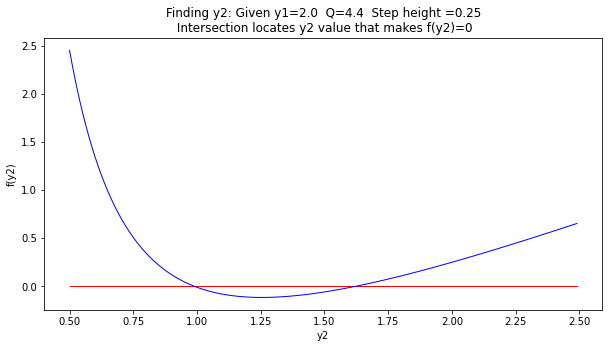

In [315]:
# Example 2.1 
# Prototype Functions

def spNRG(y,width,discharge,gravity): #specific energy in a rectangular channel
    numerator=discharge**2
    denominator=(2.0*gravity)*(width**2)*(y**2)
    if denominator == 0.0: #probably depth is zero
        raise Exception("divide by zero, check your inputs dumbass!")
    spNRG=numerator/denominator + y
    return(spNRG)

def func(y1,y2,width,discharge,gravity,deltaz): #our function to find zeros
    func = spNRG(y2,width,discharge,gravity) + deltaz - spNRG(y1,width,discharge,gravity)
    return(func)

# Find y2 given y1, B, Q, deltaz
# Approach Section
B = 1.0  #m
y1 = 2.0 #m
Q = 2.2*y1*B  #m^3/s
g = 9.81 #m/s^2
# Step-up Section
y2 = 0.0 #m initial guess
deltaz = 0.25 #m zero means no step

# Graph to get good root guesses for bisection
y2list = []
f2list = []
startguess = 0.5
for i in range(200):
    guess = startguess + float(i)*0.01
    y2list.append(guess)
    f2list.append(func(y1,guess,B,Q,g,deltaz))
import matplotlib.pyplot as plt # the python plotting library
plottitle ='Finding y2: Given y1=' + str(y1) + '  Q=' + str(Q) + '  Step height ='+str(deltaz) + '\n Intersection locates y2 value that makes f(y2)=0'
mydata = plt.figure(figsize = (10,5)) # build a square drawing canvass from figure class
plt.plot([y2list[0],y2list[-1]], [0,0], c='red',linewidth=1) 
plt.plot(y2list, f2list, c='blue',linewidth=1)
plt.xlabel('y2')
plt.ylabel('f(y2)')
plt.title(plottitle)
plt.show()

In [316]:
# Set-up a bisection-type solver
howmany = 25 # number of iterations
clow = 1.25 # lower limit for y2
chigh = 2.50 # upper limit for y2
dtrue = 0.0 # ground truth value
tol = 1e-6 # desired accuracy

import numpy # useful library with absolute value and sign functions

############ Learning Phase ################
# check if clow and chigh bound a solution
if numpy.sign(func(y1,clow,B,Q,g,deltaz)-dtrue) == numpy.sign(func(y1,chigh,B,Q,g,deltaz)-dtrue):
    print(func(y1,clow,B,Q,g,deltaz)-dtrue)
    print(func(y1,chigh,B,Q,g,deltaz)-dtrue)
    raise Exception("The scalars clow and chigh do not bound a solution")

for iteration in range(howmany):  

# get midpoint
    m = (clow + chigh)/2

    if numpy.abs(func(y1,m,B,Q,g,deltaz)-dtrue) < tol:
        # stopping condition, report m as root
        print('y2 = ',round(m,3),"f(y2)=",round(func(y1,m,B,Q,g,deltaz),3))
        break
    elif numpy.sign(func(y1,clow,B,Q,g,deltaz)-dtrue) == numpy.sign(func(y1,m,B,Q,g,deltaz)-dtrue):
        # case where m is an improvement on a. 
        # Make recursive call with a = m
        clow = m # update clow with m
    elif numpy.sign(func(y1,chigh,B,Q,g,deltaz)-dtrue) == numpy.sign(func(y1,m,B,Q,g,deltaz)-dtrue):
        # case where m is an improvement on b. 
        # Make recursive call with b = m
        chigh = m # update chigh with m
####################################################

y2 =  1.621 f(y2)= -0.0


Using the upper root we can summarize and check the energies for choke flow.

In [324]:
# Summary and Check for Choke
# Approach Section
z1 = 0.0
y1 = 2.0
B1 = 1
Q = 2.2*y1*B1
g = 9.81
E1min = spNRG(ycrit(B1,Q,g),B1,Q,g)
yc1 = ycrit(B1,Q,g)
E1 = spNRG(y1,B1,Q,g)
F1 = Fr(y1,B1,Q,g)
print('----Approach Section----')
print('Emin ',round(E1min,3),' yc ',round(yc1,3))
print('y1 = ',round(y1,3),'E1 = ',round(E1,3),' Fr1 = ',round(F1,3))
print('WSE1 =',round(y1+z1,3))
# Step-Up Section
deltaz = 0.25
y2 = 1.621
B2 = 1
g = 9.81
E2min = spNRG(ycrit(B2,Q,g),B2,Q,g)
yc2 = ycrit(B2,Q,g)
E2 = spNRG(y2,B2,Q,g)+deltaz
F2 = Fr(y2,B2,Q,g)
print('----Step-Up Section----')
print('Emin ',round(E2min,3),' yc ',round(yc2,3))
print('y2 = ',round(y2,3),'E2 = ',round(E2,3),' Fr2 = ',round(F2,3))
print('WSE1 =',round(y2+z1+deltaz,3))

----Approach Section----
Emin  1.881  yc  1.254
y1 =  2.0 E1 =  2.247  Fr1 =  0.247
WSE1 = 2.0
----Step-Up Section----
Emin  1.881  yc  1.254
y2 =  1.621 E2 =  2.247  Fr2 =  0.463
WSE1 = 1.871


Now repeat but with a step of $\Delta z = 0.5~m$

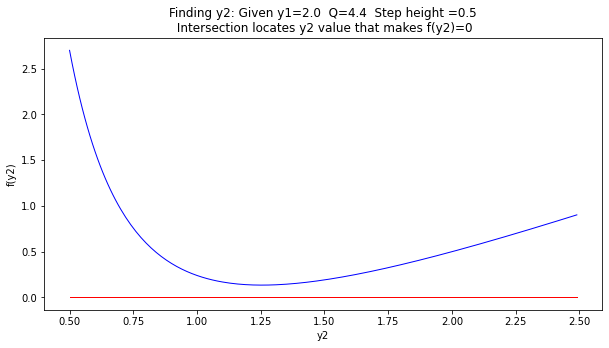

In [346]:
# Find y2 given y1, B, Q, deltaz
# Approach Section
B = 1.0  #m
y1 = 2.0 #m
Q = 2.2*2.0*B  #m^3/s
g = 9.81 #m/s^2
# Step-up Section
y2 = 0.0 #m initial guess
deltaz = 0.5 #m INCREASED!!!

# Graph to get good root guesses for bisection
y2list = []
f2list = []
startguess = 0.5
for i in range(200):
    guess = startguess + float(i)*0.01
    y2list.append(guess)
    f2list.append(func(y1,guess,B,Q,g,deltaz))
import matplotlib.pyplot as plt # the python plotting library
plottitle ='Finding y2: Given y1=' + str(y1) + '  Q=' + str(Q) + '  Step height ='+str(deltaz) + '\n Intersection locates y2 value that makes f(y2)=0'
mydata = plt.figure(figsize = (10,5)) # build a square drawing canvass from figure class
plt.plot([y2list[0],y2list[-1]], [0,0], c='red',linewidth=1) 
plt.plot(y2list, f2list, c='blue',linewidth=1)
plt.xlabel('y2')
plt.ylabel('f(y2)')
plt.title(plottitle)
plt.show()

So we have a choke, and the approach depth must increase to get over the step.  Flow on the step is critical

So use the summary energies to find a suitable upstream depth

In [370]:
# Summary and Check for Choke
# Approach Section
z1 = 0.0
y1 = 2.172 # original was 2.0, but needs more head
B1 = 1
Q = 2.2*2.0*B1
g = 9.81
E1min = spNRG(ycrit(B1,Q,g),B1,Q,g)
yc1 = ycrit(B1,Q,g)
E1 = spNRG(y1,B1,Q,g)
F1 = Fr(y1,B1,Q,g)
print('----Approach Section----')
print('Emin ',round(E1min,3),' yc ',round(yc1,3))
print('y1 = ',round(y1,3),'E1 = ',round(E1,3),' Fr1 = ',round(F1,3))
print('WSE1 =',round(y1+z1,3))
# Step-Up Section
deltaz = 0.5
y2 = 1.254 # know this is critical because have a choke!
B2 = 1
g = 9.81
E2min = spNRG(ycrit(B2,Q,g),B2,Q,g)
yc2 = ycrit(B2,Q,g)
E2 = spNRG(y2,B2,Q,g)+deltaz
F2 = Fr(y2,B2,Q,g)
print('----Step-Up Section----')
print('Emin ',round(E2min,3),' yc ',round(yc2,3))
print('y2 = ',round(y2,3),'E2 = ',round(E2,3),' Fr2 = ',round(F2,3))
print('WSE1 =',round(y2+z1+deltaz,3))

----Approach Section----
Emin  1.881  yc  1.254
y1 =  2.172 E1 =  2.381  Fr1 =  0.193
WSE1 = 2.172
----Step-Up Section----
Emin  1.881  yc  1.254
y2 =  1.254 E2 =  2.381  Fr2 =  1.001
WSE1 = 1.754


If we put the choke flow value into the plotting routine we find we are just intersecting at a single point

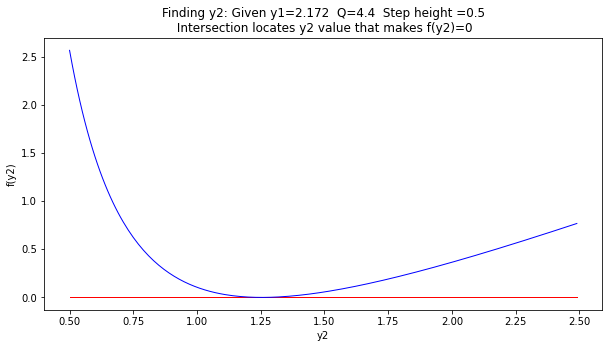

In [371]:
# Find y2 given y1, B, Q, deltaz
# Approach Section
B = 1.0  #m
y1 = 2.172 #m
Q = 2.2*2.0*B  #m^3/s
g = 9.81 #m/s^2
# Step-up Section
y2 = 0.0 #m initial guess
deltaz = 0.5 #m INCREASED!!!

# Graph to get good root guesses for bisection
y2list = []
f2list = []
startguess = 0.5
for i in range(200):
    guess = startguess + float(i)*0.01
    y2list.append(guess)
    f2list.append(func(y1,guess,B,Q,g,deltaz))
import matplotlib.pyplot as plt # the python plotting library
plottitle ='Finding y2: Given y1=' + str(y1) + '  Q=' + str(Q) + '  Step height ='+str(deltaz) + '\n Intersection locates y2 value that makes f(y2)=0'
mydata = plt.figure(figsize = (10,5)) # build a square drawing canvass from figure class
plt.plot([y2list[0],y2list[-1]], [0,0], c='red',linewidth=1) 
plt.plot(y2list, f2list, c='blue',linewidth=1)
plt.xlabel('y2')
plt.ylabel('f(y2)')
plt.title(plottitle)
plt.show()

No point in trying bisection (it will be hopeless because we cannot bracket the root) lets see how close

In [373]:
print('f(y2=1.254) =',round(func(y1,1.254,B,Q,g,deltaz),3))


f(y2=1.254) = 0.0


Chokes also occur in contractions as in Figure 2.7, but instead of a step increase we are changing the width of a channel.

Approach section Emin  5.006936799184506
Contracted section Emin  7.14957638781289


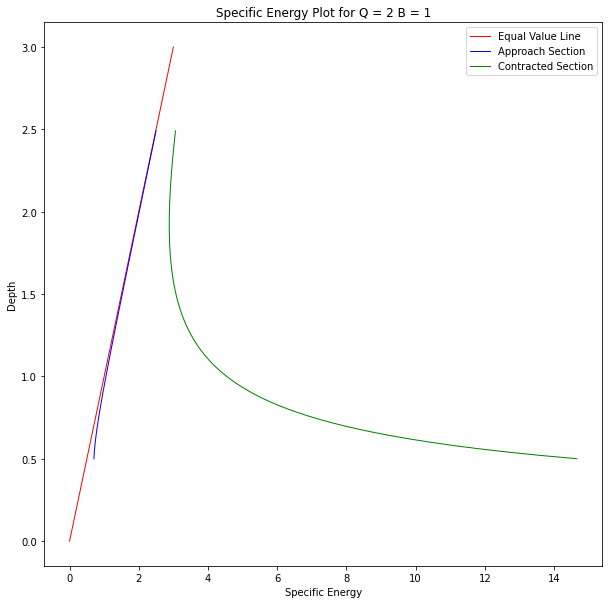

In [179]:
# Choke Figure 2.7 
# Approach Section
Q = 2
B1 = 2
g = 9.81
y1list = []
E1list = []
E1min = spNRG(ycrit(B1,Q,g),B1,Q,g)
print('Approach section Emin ',E1min)
# Contracted Section
Q = 2
B2 = 0.24
g = 9.81
y2list = []
E2list = []
E2min = spNRG(ycrit(B2,Q,g),B2,Q,g)
print('Contracted section Emin ',E2min)
# Build up vectors to plot
startvalue = 0.5
for i in range(200):
    guess = startvalue + float(i)*0.01
    y1list.append(guess)
    E1list.append(spNRG(guess,B1,Q,g))
    y2list.append(guess)
    E2list.append(spNRG(guess,B2,Q,g))
import matplotlib.pyplot as plt # the python plotting library
plottitle ='Specific Energy Plot for Q = ' + str(Q) + ' B = ' + str(B)
mydata = plt.figure(figsize = (10,10)) # build a square drawing canvass from figure class
plt.plot([0,3], [0,3], c='red',linewidth=1) 
plt.plot(E1list, y1list, c='blue',linewidth=1)
plt.plot(E2list, y2list, c='green',linewidth=1)
plt.xlabel('Specific Energy')
plt.ylabel('Depth')
plt.legend(['Equal Value Line','Approach Section','Contracted Section'])
plt.title(plottitle)
plt.show()

## Froude Number

Recall the Froude number,

$$ Fr = \frac{V}{\sqrt{gy}}$$

The specific energy diagram identifies three flow regimes:

1. supercritical; characterized by small $y$, large $V$, greater than wave celerity $c$, $Fr >1$
2. critical; minimum specific energy for the channel and flow; $y=y_c$, $Fr = 1$, velocity is wave celerity.
3. subcritical;characterized by large $y$, small $V$, smaller than wave celerity $c$, $Fr <1$

Wave celerity is speed of shallow waves on watre surface.  Drop a pebble on water, ripples move away from the impact, speed of the ripples is the celerity - controlled largely by water depth.

Choking is the situation where the channel bottom is high enough or downstream width is small enough to just start to slow flow and cause the flow depth to increase.

## Critical Depth Non-Rectangular
Generally use the depth measured from thalweg point, and apply principles of continunity already described, key is

![](cross-section.png)

$$dA = T(y)dy$$

So the hydraulic characteristics are quite important. We obtain the depth-area, depth-perimeter, depth-topwidth functions for odd shapes by numerical tabulations and interpolation.

$$E = y + \frac{\alpha Q^2}{2gA^2}$$

at critical depth

$$ \frac{dE}{dy} = 0 = 1 - \frac{\alpha Q^3}{gA^3}\frac{dA}{dy}$$

In terms of hydraulic depth we have

$$ D = \frac{A}{T}$$

and at critical flow

$$D_c = \frac{A_c}{T_c}$$

and substitution gives

$$E_c = y_c + \frac{D_c}{2}$$

Table 2.1 copied below has geometric element equations for a few common geometries:

![](table2-1.png)


>An on-line calculator that can handle trapezoidal, triangular and rectangular is at <br>
> [Trapezoidal Channel Geometric Elements](http://54.243.252.9/toolbox/swhydraulics/TrapezoidChannelUS/TrapezoidChannelUS.html)
> <br>and a similar tool for circular channels is at <br>
> [Circular Channel Geometric Elements](http://54.243.252.9/toolbox/swhydraulics/CircularChannelUS/CircularChannelUS.html)

## Contractions & Expansions

The general equation for steady flow in expansions

![](expansion.png)

and/or contractions

![](contraction.png)

is

$$ y_1 + \frac{\alpha V_1^2}{2g} + z_1 = y_2 + \frac{\alpha V_2^2}{2g} + z_2 + K_L |\frac{1}{A_2^2}-\frac{1}{A_1^2}|\frac{Q^2}{2g}$$

where the last term is the change in velocity head multiplied by a loss coefficient (structurally like a Darcy-Wiseass head loss model)

$$K_L = \frac{1 - \frac{b_1}{b_2}}{1 + \frac{b_1}{b_2}}$$

applicable when $Fr<\frac{1}{2}$

Expansions tend to have higher head loss because of the flow separation in the wake/shadow formed by the walls at the abrubt change in width.  If the designer arranges for a smooth transition the head loss can be minimized but not eliminated. 

For contractions the following is often applied

$$h_L = (0.11 ~\text{to}~ 0.23)\frac{V^2}{2g}$$

the lower value for a rounded transition, the larger for a sharp transition.

## Overbank Flow

![](overbank.png)

Different resistance to flow in different parts of the cross section.  Can obtain different $y_c$ in each part of the cross section. Can also have large velocity differences across the section with high velocities in the main channel section (usually) and possibly very low velocities in the overbanks.  It creates a problem for 1-D models if the velocity itself is important (as opposed to just getting the total discharge right).